<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project2 Predictive Modelling:Home Sale Price of Ames, IA

### Part 1 Data Cleaning and Exploratory Data Analysis

---

## Problem Statement

To predict as accurately as possible the sale price of a house based on the Ames Housing Dataset using regression techniques enhanced by feature engineering and regularization. Additionally, the model should also help to perform inferential learning to provide homeowners and investers with recommendation on the features that would fetch good sale price and those that would hurt the sale price.

## Contents:
- [Data Import and Classification of Variables](#Data-Import-and-Classification-of-Variables)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing & Feature Engineering](#Preprocessing-&-Feature-Engineering)
- [Model, Predict & Evaluate](#Model,-Predict-&-Evaluate)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Import libtaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,Lasso, ElasticNetCV,Ridge,ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

## Data Import and Classification of Variables

In [2]:
# Read in data from train Dataframe
train=pd.read_csv('datasets/train.csv')
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [3]:
#Check for column datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
# Read in data from test Dataframe
test=pd.read_csv('datasets/test.csv')
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [5]:
#Check for column datatypes
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [6]:
train.shape, test.shape #Check the both data shapes

((2051, 81), (879, 80))

#### Droping ID and PID
Id, PID and SalePrice are not features and need to be removed from the predictor list.

'Id' and 'PID' are property ID numbers that should not affect sale price.'SalePrice' is the target, which will be removed from predictor list before modeling and prediction.

In [7]:
drop_cols = ['PID','Id'] #Drop Id and PID columns since they do not help in data analysis
train = train.drop(drop_cols, axis=1)
kaggle_test = test.drop(drop_cols, axis=1)
kaggle_test.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0          190        RM          69.0      9142   Pave  Grvl       Reg   
1           90        RL           NaN      9662   Pave   NaN       IR1   
2           60        RL          58.0     17104   Pave   NaN       IR1   
3           30        RM          60.0      8520   Pave   NaN       Reg   
4           20        RL           NaN      9500   Pave   NaN       IR1   

  Land Contour Utilities Lot Config  ... 3Ssn Porch Screen Porch Pool Area  \
0          Lvl    AllPub     Inside  ...          0            0         0   
1          Lvl    AllPub     Inside  ...          0            0         0   
2          Lvl    AllPub     Inside  ...          0            0         0   
3          Lvl    AllPub     Inside  ...          0            0         0   
4          Lvl    AllPub     Inside  ...          0          185         0   

  Pool QC Fence Misc Feature  Misc Val  Mo Sold  Yr Sold  Sale Type  
0     NaN   NaN          NaN         0        4     2006        WD   
1     NaN   NaN          NaN         0        8     2006        WD   
2     NaN   NaN          NaN         0        9     2006        New  
3     NaN   NaN          NaN         0        7     2007        WD   
4     NaN   NaN          NaN         0        7     2009        WD   

[5 rows x 78 columns]

#### Renaming columns

In [8]:
def rename_col(dataframe): #Function to rename columns
    dataframe.columns=map(lambda x:x.lower().replace(' ','_'), dataframe.columns)

In [9]:
rename_col(train) #Renaming both train and test 
rename_col(kaggle_test)

In [10]:
train.columns #Display renamed columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

In [11]:
kaggle_test.columns #Display renamed columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

In [12]:
#To check if train and test DataFrame columns are the same
list(kaggle_test.columns) == list(train.drop('saleprice', axis=1).columns) 

True

In [13]:
train.shape, kaggle_test.shape #Check both dataframe shapes

((2051, 79), (879, 78))

There are **36 relevant numerical features.**  Which can be categorised as below.
<br>
-MSSubClass, which "identifies the type of dwelling involved in the sale", is encoded as numeric but is in reality a categorical variable.
<br>
-Square footage: Indicates the square footage of certain features, i.e. 1stFlrSF (First floor square footage) and GarageArea (Size of garage in square feet).
<br>
-Time: Time related variables like when the home was built or sold.Room and amenties: data that represent amenties like “How many bathrooms?”
<br>
-Condition and quality: Subjective variables rated from 1–10.

#### Create Numerical & Categorical features lists
The following columns have numeric values but data is categorical:
 MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.
Mo Sold (Discrete): Month Sold (MM)
 Yr Sold (Discrete): Year Sold (YYYY)
#(Yr Sold unique values: 2006, 2007, 2008, 2009, 2010)

In [14]:
#Convert the columns as numeric and categorical
numeric_col=list(train._get_numeric_data().columns.drop(['ms_subclass','mo_sold','yr_sold','saleprice'])) 
categorical_col=[x for x in train.columns if (x not in numeric_col)&(x !='saleprice')]

In [15]:
# convert numeric categorical columns into strings (columns to be dummied later)

train['ms_subclass'] = train['ms_subclass'].astype(str)
train['mo_sold'] = train['mo_sold'].astype(str)
#train['yr_sold'] = train['yr_sold'].astype(str)

kaggle_test['ms_subclass'] = kaggle_test['ms_subclass'].astype(str)
kaggle_test['mo_sold'] = kaggle_test['mo_sold'].astype(str)
kaggle_test['yr_sold'] = kaggle_test['yr_sold'].astype(str)

#### Numerical features Distribution using Histogram
Most of the variables that deal with the actual physical space of the apartment are postively skewed — which makes sense, as people tend to live in smaller homes/apartments apart from the extremely wealthy. Sale Price also has a similar positively skewed distribution — I hypothesize that the variables dealing with the actual dimensions of the apartment have a large impact on Sale Price.

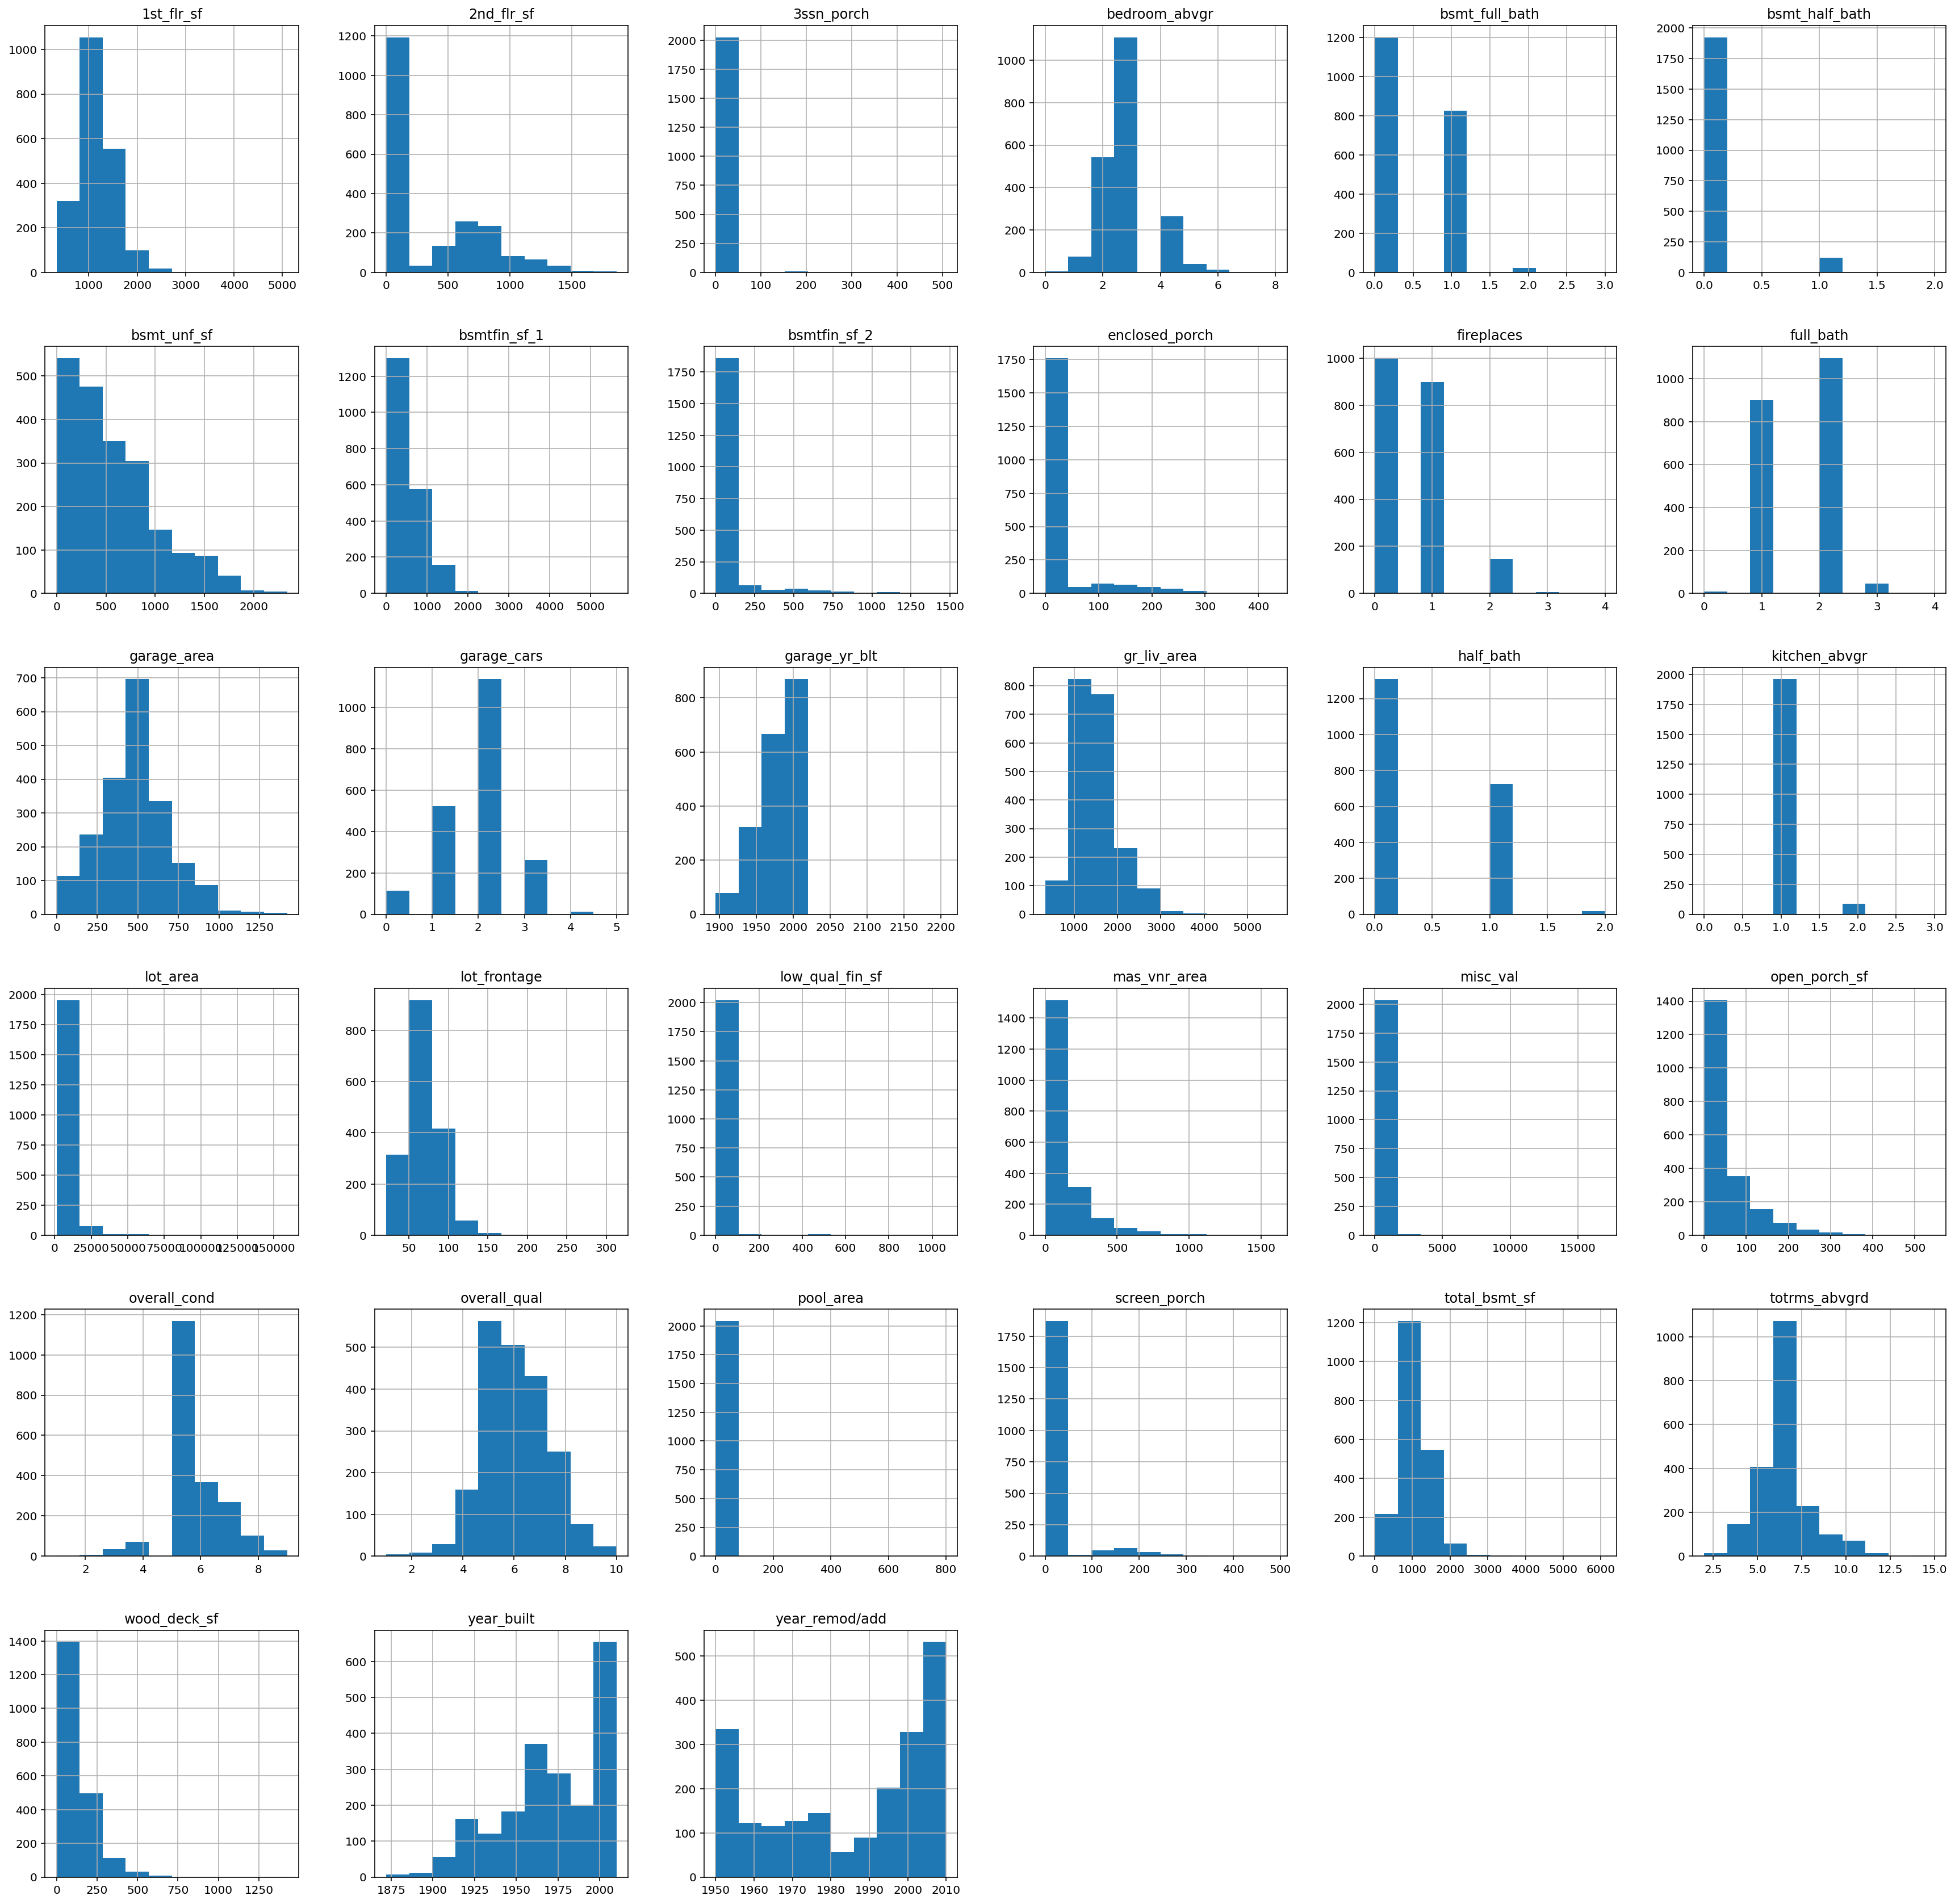

In [16]:
#Check the distribution of numerical columns
train.hist(figsize=(30,30),column=numeric_col);

#### Target feature(SalePrice) Distribution using Histogram
Sale Price also has a similar positively skewed distribution as the other numerical features. Because people tend to live in smaller homes/apartments apart from the extremely wealthy and thus lower saleprice.

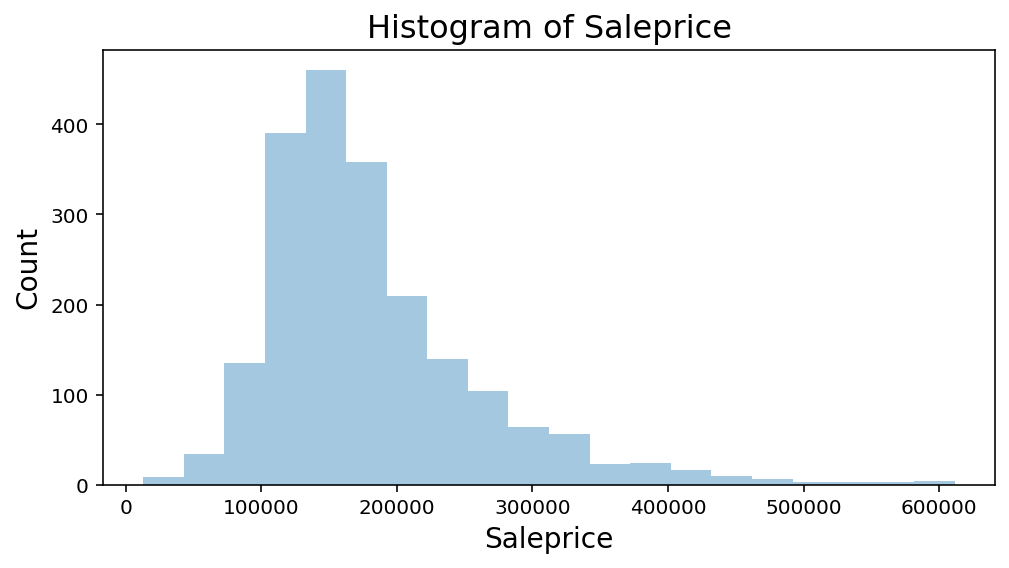

In [17]:
#Check the distribution of saleprice
plt.figure(figsize=(8, 4))
sns.distplot(train.saleprice, bins=20, kde=False)
plt.title('Histogram of Saleprice', size=16)
plt.xlabel('Saleprice', size=14)
plt.ylabel('Count', size=14);

## Data Cleaning

#### Identifying Null Values

Null values among the whole dataframes were identified. The plot below shows the null value counts based on the feature columns. It is noted that most of the null values are contributed by very few columns. 

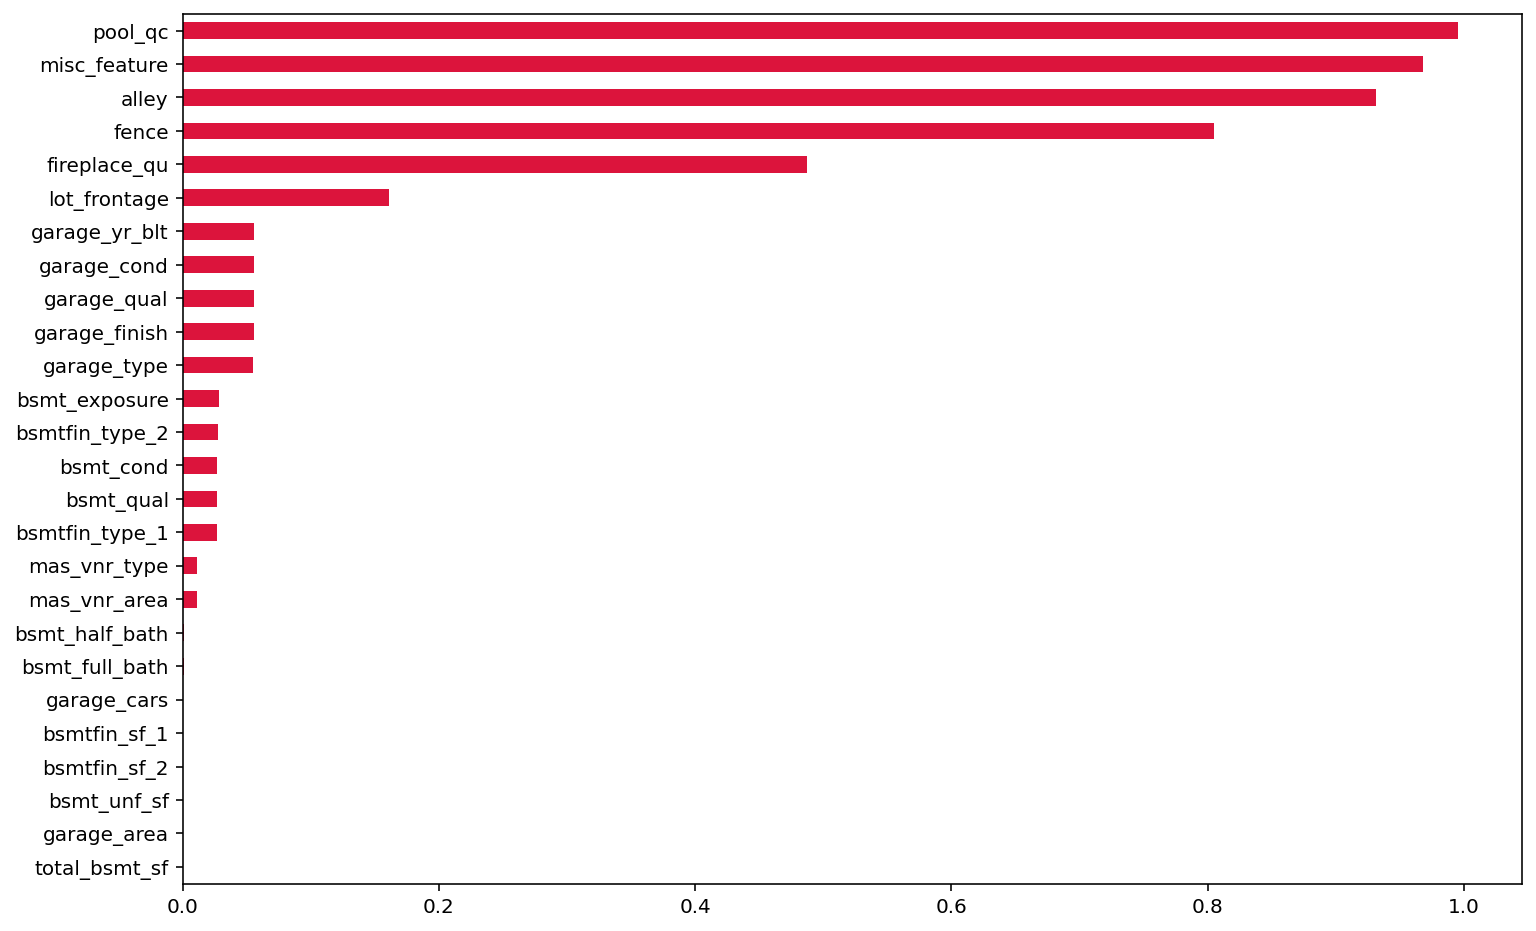

In [18]:
#Check null values from Train dataframe.
plt.figure(figsize=(12,8))
missing=train.isnull().mean() #Check the missing values 
missing=missing[missing.values>0]
missing.sort_values(ascending= True).plot(kind= 'barh', color = 'crimson'); #Plot missing values

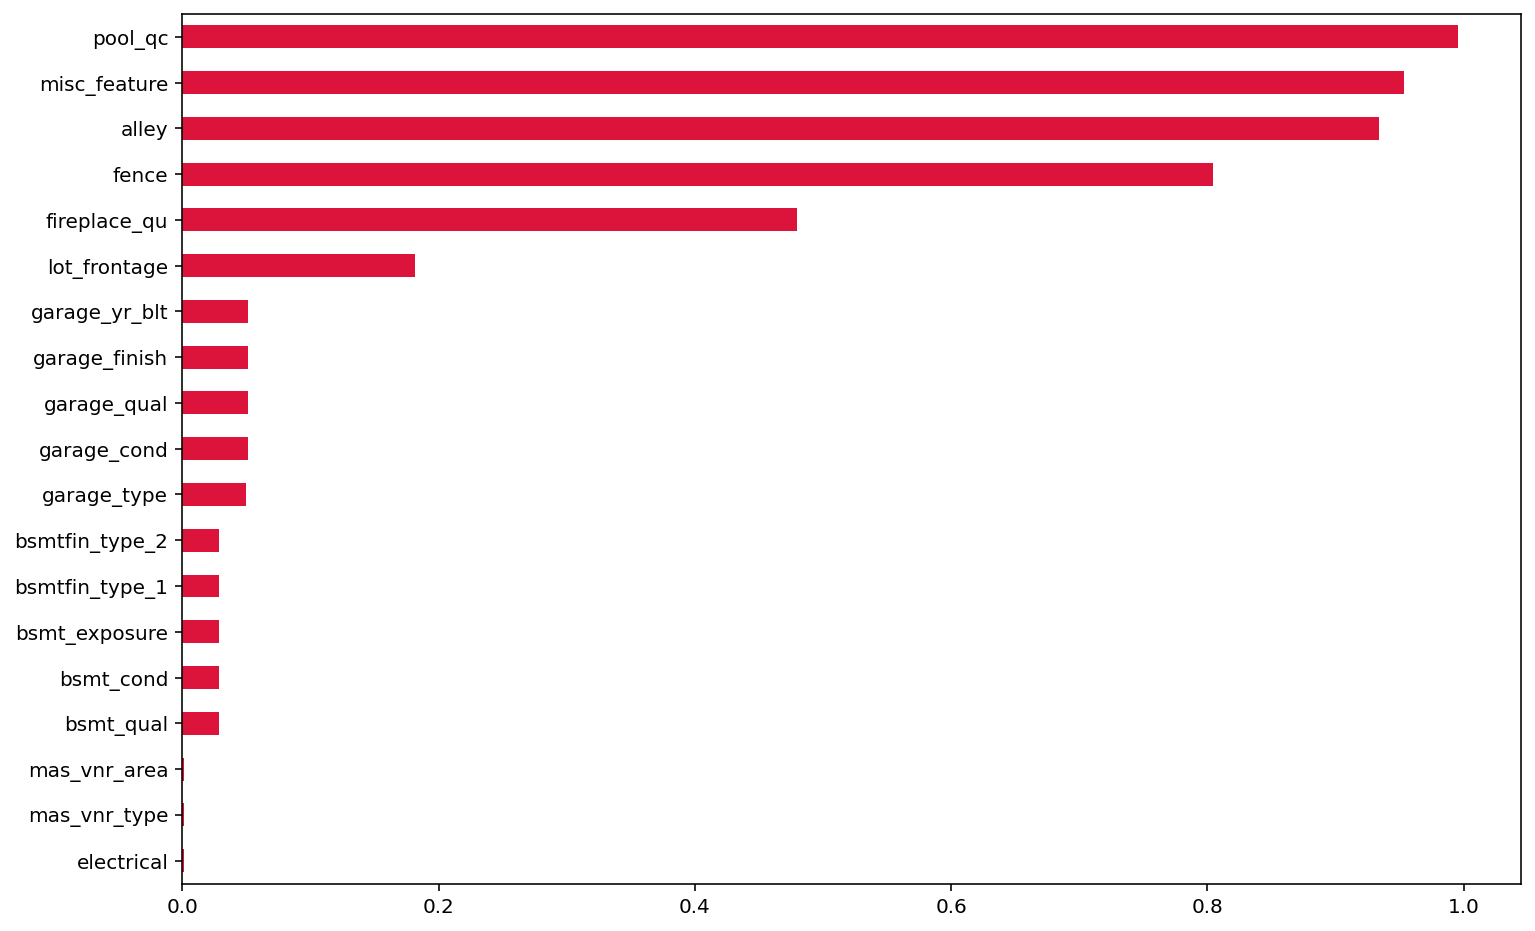

In [19]:
#Check null values from Test dataframe.
plt.figure(figsize=(12,8))
missing=kaggle_test.isnull().mean() #Check the missing values 
missing=missing[missing.values>0]
missing.sort_values(ascending= True).plot(kind= 'barh', color = 'crimson'); #Plot missing values

#### Droping Columns with Null Values
Columns that contributed the most of the null values are identified as Pool Qc, Misc Features, Alley, Fence and Fireplace Qu. Those 5 columns were dropped since those columns has null values mostly.

In [20]:
#Drop the columns with large null values. 
drop_cols = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu']
train=train.drop(drop_cols,axis=1)
kaggle_test=kaggle_test.drop(drop_cols,axis=1)

#### Filling Nulls Values
After droping the 5 columns that contributed to most of the null values, the rest of the null values were filled with some values. Inorder to do that, columns were identified as numerical or categorical. It was noted that most of the null values indicate that that particular house has no such feature. Thus null values in numerical columns were replaced with 0, that those in categorical columns were replaced with 'No' to indicate the absence of certain feature. 

In [21]:
#Convert the columns as numeric and categorical
numeric_col=list(train._get_numeric_data().columns.drop(['saleprice']))
categorical_col=[x for x in train.columns if (x not in numeric_col)&(x !='saleprice')]

In [22]:
#Fill the numeric columns with null values with 0, and categorical column with null values with 'No'
train[numeric_col] = train[numeric_col].fillna(0)
kaggle_test[numeric_col] = kaggle_test[numeric_col].fillna(0)
train[categorical_col] = train[categorical_col].fillna('No')
kaggle_test[categorical_col] = kaggle_test[categorical_col].fillna('No')

## Exploratory Data Analysis

#### Identify Feature Correlations

Heatmap below helps to identify correlations among different features and also with the target feature that is the SalePrice.

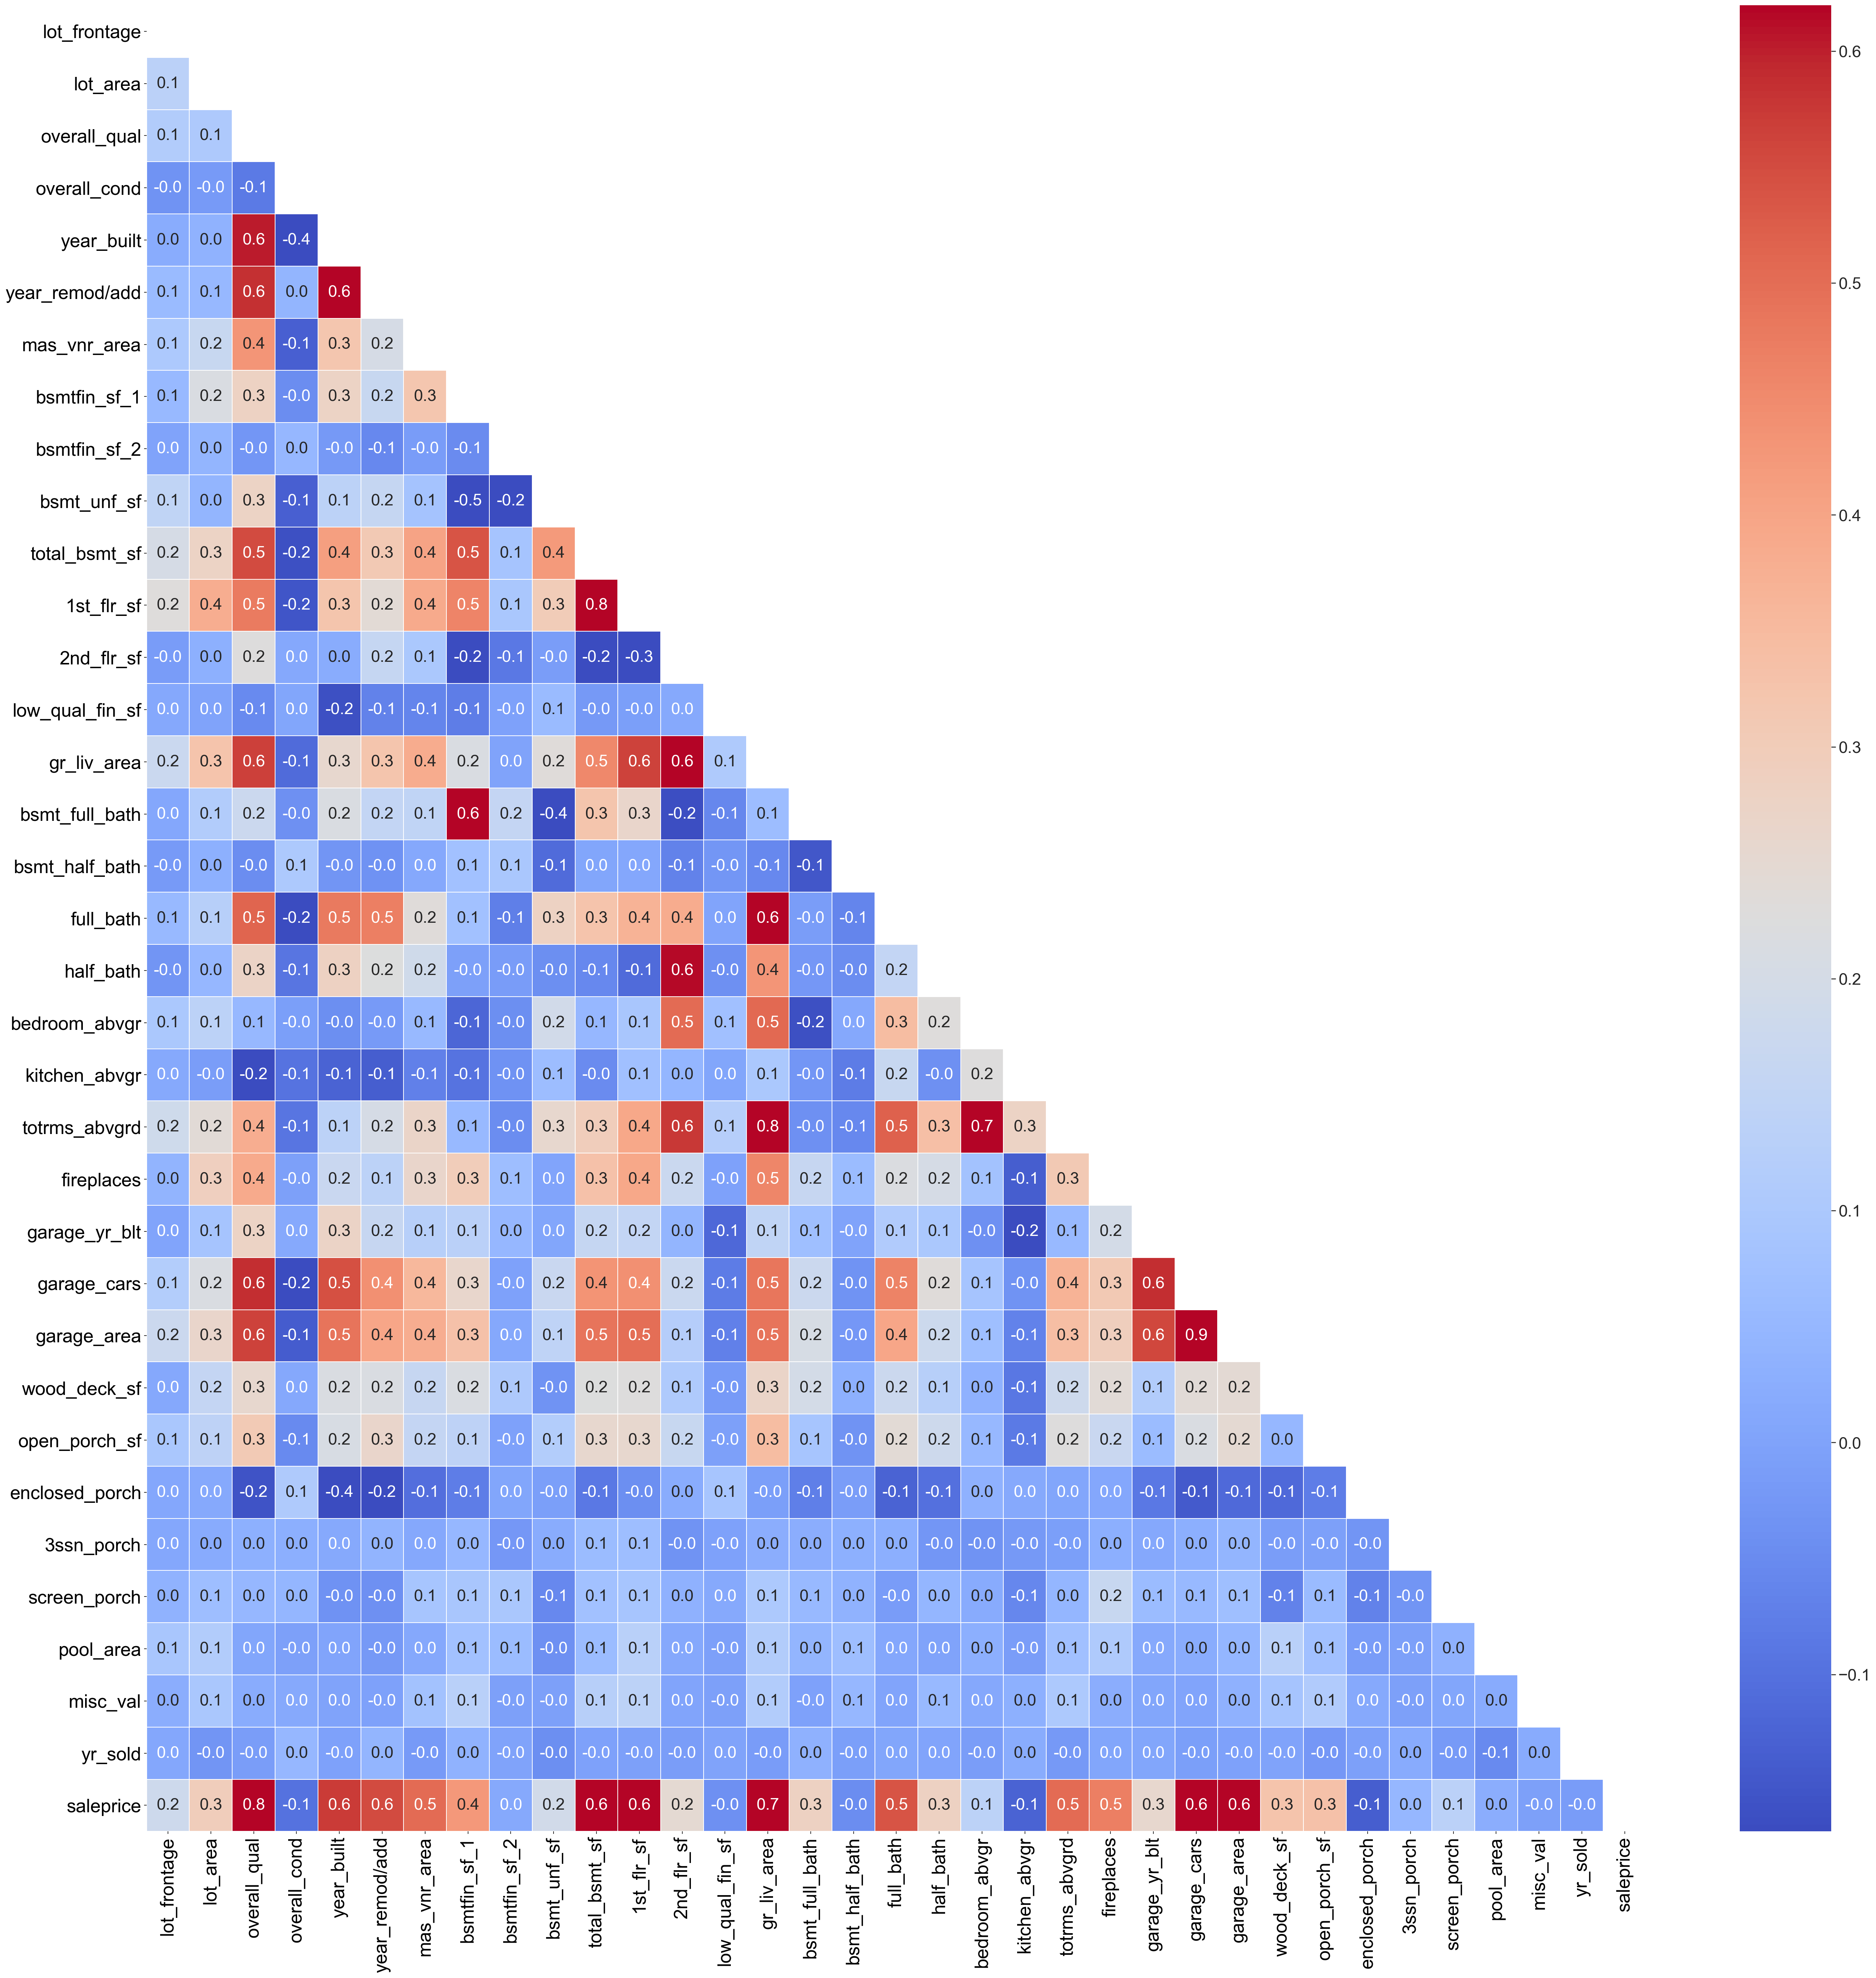

In [23]:
#Display the feature correaltion using a heatmap
fix, ax = plt.subplots(figsize=(45,45))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=2)
sns.heatmap(train.corr(), mask = mask, ax= ax, 
            annot = True ,cmap = 'coolwarm',
            linewidth=0.5,robust=True,fmt=".1f",
            annot_kws={'size':22},square=False);
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=25,rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=25,rotation=0);

Features are sorted based on the correlations and are displayed below in ascending order. 

In [24]:
#Display the list of highly correlated columns with saleprice
np.abs(train.corr())[['saleprice']].sort_values('saleprice',ascending=False)

saleprice
saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.649897
garage_cars       0.647781
total_bsmt_sf     0.629303
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
totrms_abvgrd     0.504014
mas_vnr_area      0.503579
fireplaces        0.471093
bsmtfin_sf_1      0.423856
open_porch_sf     0.333476
wood_deck_sf      0.326490
lot_area          0.296566
bsmt_full_bath    0.283332
half_bath         0.283001
garage_yr_blt     0.258645
2nd_flr_sf        0.248452
bsmt_unf_sf       0.190861
lot_frontage      0.181456
bedroom_abvgr     0.137067
enclosed_porch    0.135656
screen_porch      0.134581
kitchen_abvgr     0.125444
overall_cond      0.097019
3ssn_porch        0.048732
bsmt_half_bath    0.045290
low_qual_fin_sf   0.041594
pool_area         0.023106
bsmtfin_sf_2      0.016432
yr_sold           0.015203
misc_val          0.007375

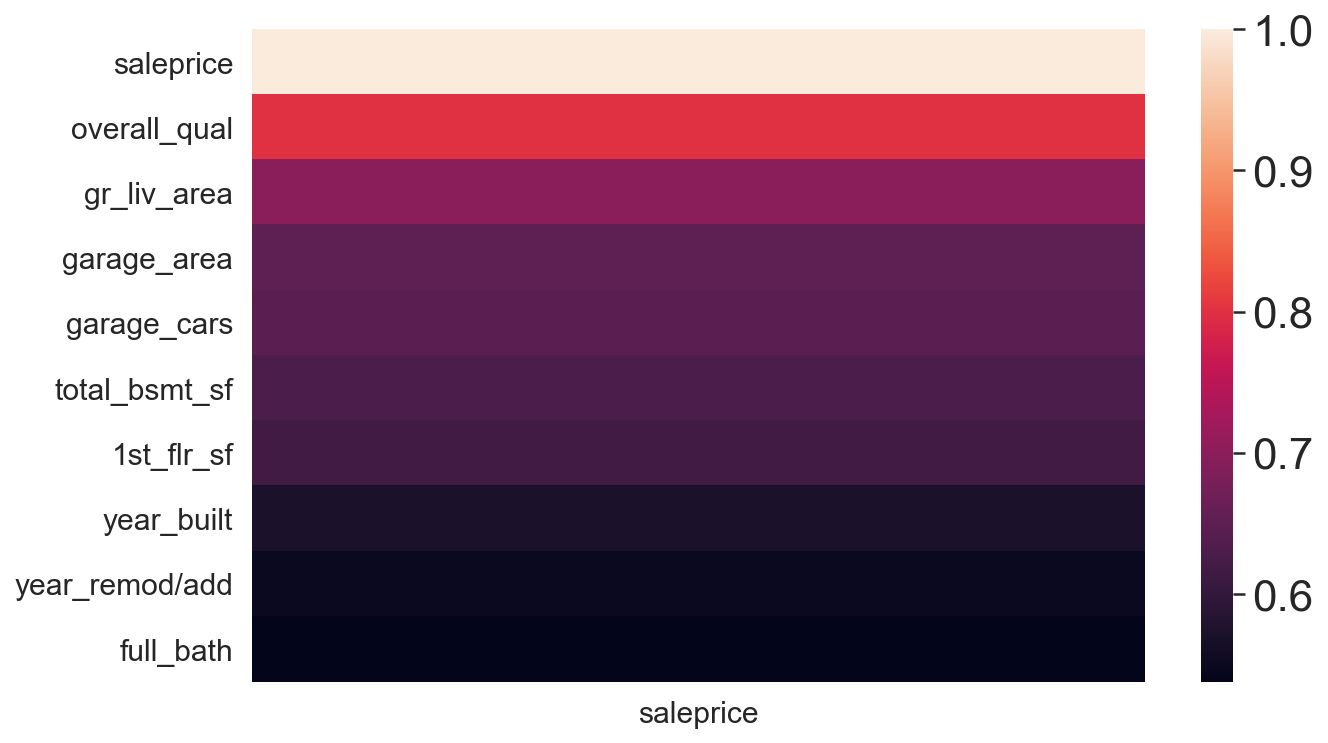

In [25]:
#Display the top 10 highly correlated features with saleprice.
fix, ax = plt.subplots(figsize=(10,6))
top_correlation=np.abs(train.corr())[['saleprice']].sort_values('saleprice',ascending=False)
sns.heatmap(top_correlation.head(10));
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15);

It is noted that some features has strong colinearity with other features and needs to be removed for modellng.

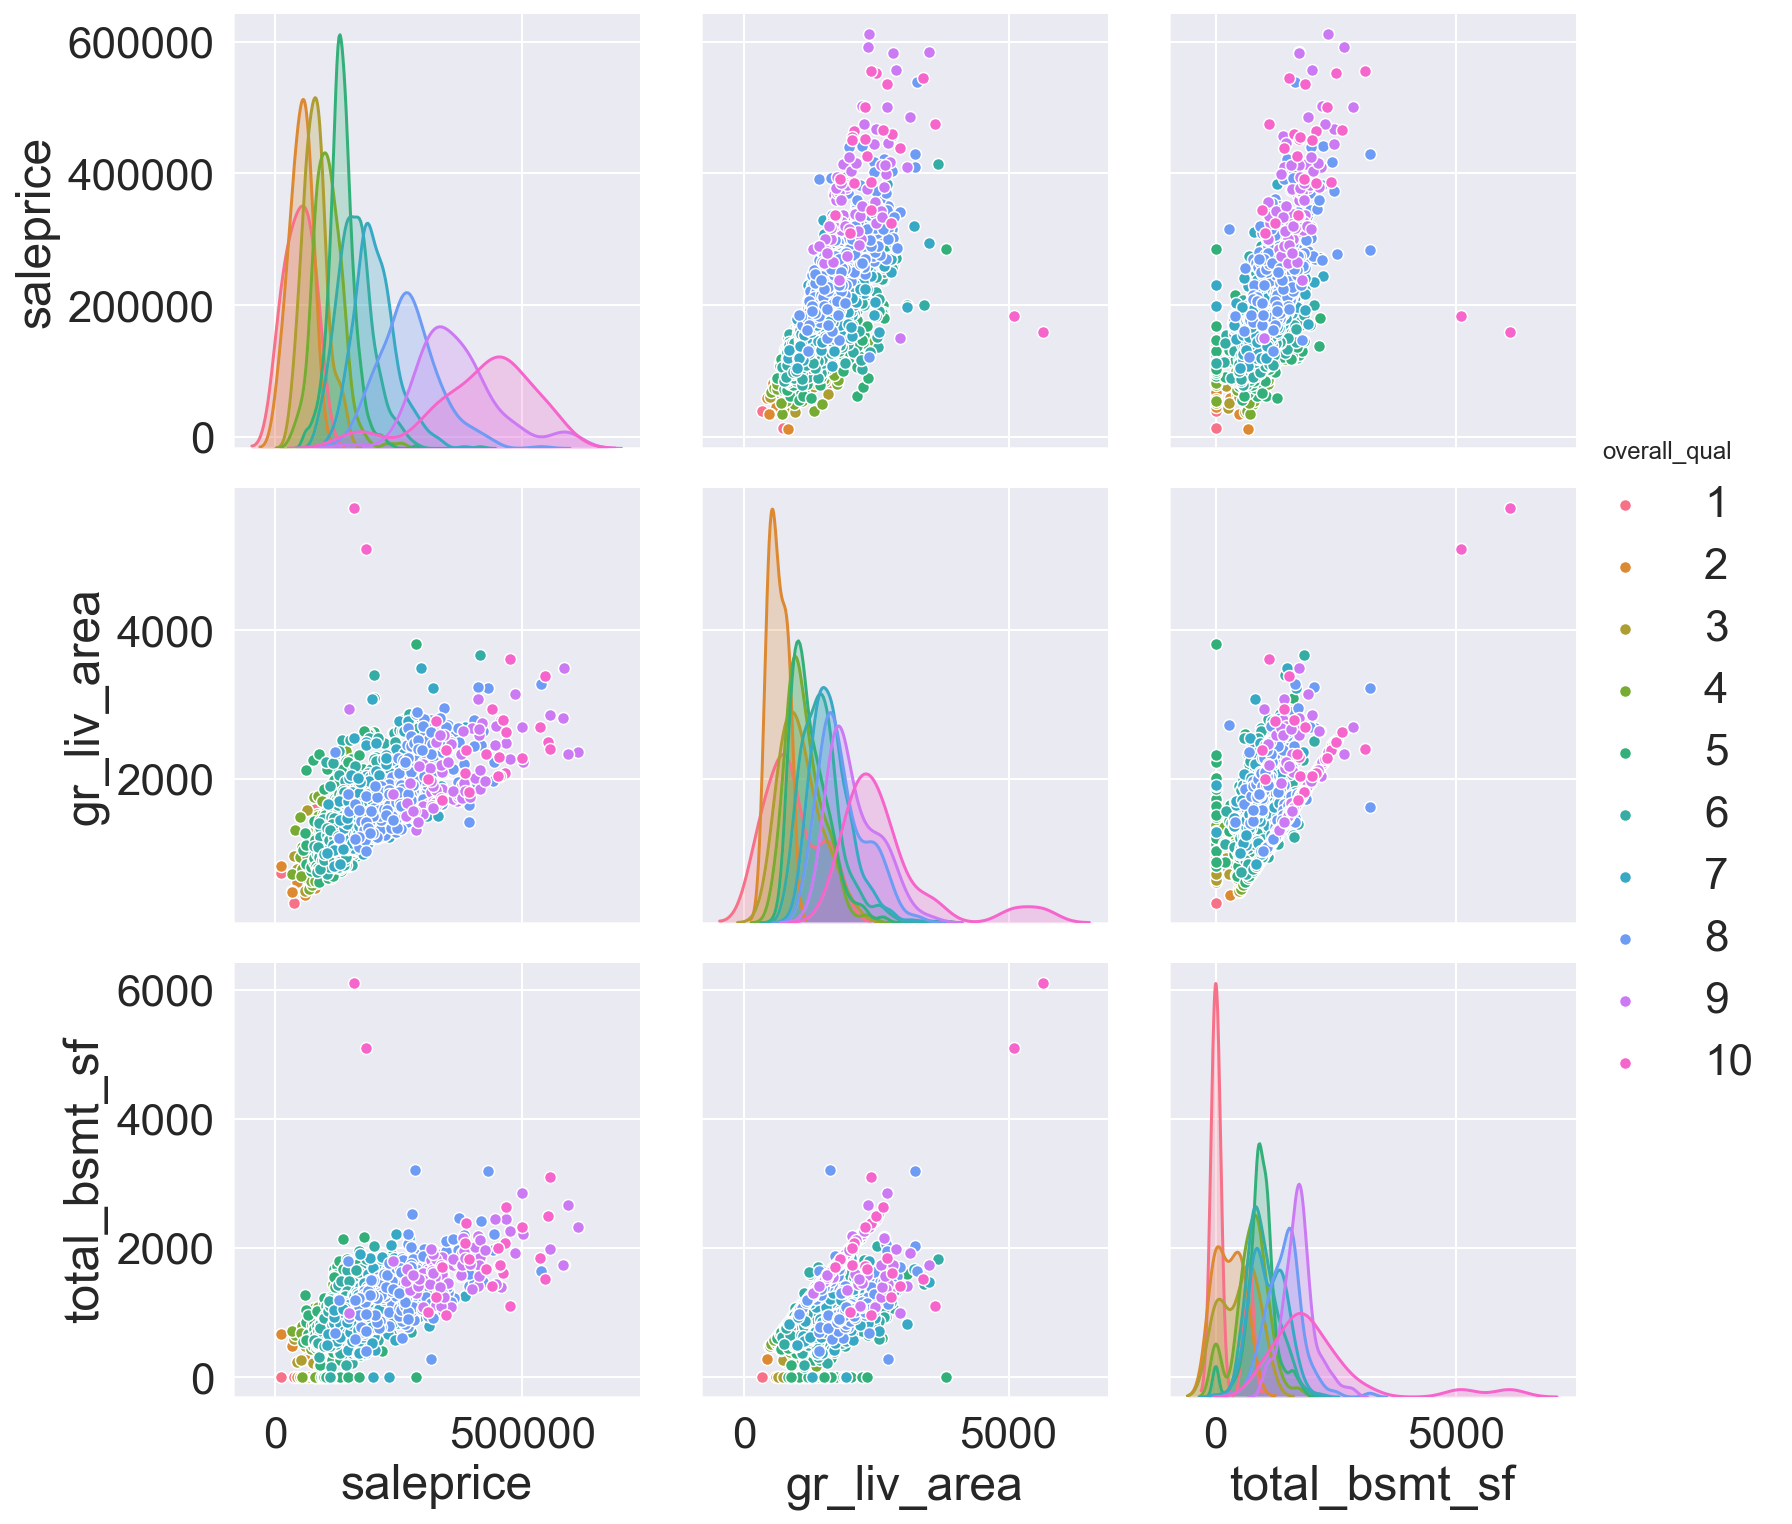

In [26]:
# pairplot to identify relationship between identified variables (total 4 at once) against each other
# to note the colinearity of gr living area and bsmt sq ft variable
pairplot = sns.pairplot(train,vars = ['saleprice','gr_liv_area','total_bsmt_sf'], 
                        hue = 'overall_qual',
                        palette = 'husl' ,height = 3.5);

In [27]:
kaggle_test.head()

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape land_contour  \
0         190        RM          69.0      9142   Pave       Reg          Lvl   
1          90        RL           0.0      9662   Pave       IR1          Lvl   
2          60        RL          58.0     17104   Pave       IR1          Lvl   
3          30        RM          60.0      8520   Pave       Reg          Lvl   
4          20        RL           0.0      9500   Pave       IR1          Lvl   

  utilities lot_config land_slope  ... wood_deck_sf open_porch_sf  \
0    AllPub     Inside        Gtl  ...            0            60   
1    AllPub     Inside        Gtl  ...          170             0   
2    AllPub     Inside        Gtl  ...          100            24   
3    AllPub     Inside        Gtl  ...            0             0   
4    AllPub     Inside        Gtl  ...            0            76   

  enclosed_porch 3ssn_porch screen_porch  pool_area  misc_val  mo_sold  \
0            112          0            0          0         0        4   
1              0          0            0          0         0        8   
2              0          0            0          0         0        9   
3            184          0            0          0         0        7   
4              0          0          185          0         0        7   

   yr_sold sale_type  
0     2006       WD   
1     2006       WD   
2     2006       New  
3     2007       WD   
4     2009       WD   

[5 rows x 73 columns]

In [28]:
#Drop inter dependant columns
def drop_dependent_col(df):
    df['total_sf']= df['total_bsmt_sf'] + df['1st_flr_sf'] + df['2nd_flr_sf']
    df.drop(['1st_flr_sf','2nd_flr_sf','total_bsmt_sf'], axis = 1, inplace = True)   
    df.drop(['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','gr_liv_area'], axis = 1, inplace = True)
drop_dependent_col(train)
drop_dependent_col(kaggle_test)
# drop from features to avoid collinearity with TotalSF
numeric_col = [x for x in numeric_col if x not in ['Total Bsmt SF', 
                                                   '1st Flr SF', '2nd Flr SF',
                                                   'bsmtfin_sf_1','bsmtfin_sf_2',
                                                   'bsmt_unf_sf','gr_liv_area']]

It is noted that when the feature 'Total Bsmt SF'(total basement sq ft) was added with '1st Flr SF'(1st Floor sq ft), and '2nd Flr Sq'(2nd floor sq ft) to be 'Total Sf'(Total sq ft) the correlation of that feature jumped up to around 0.9. This change is shown using the heatmap below.

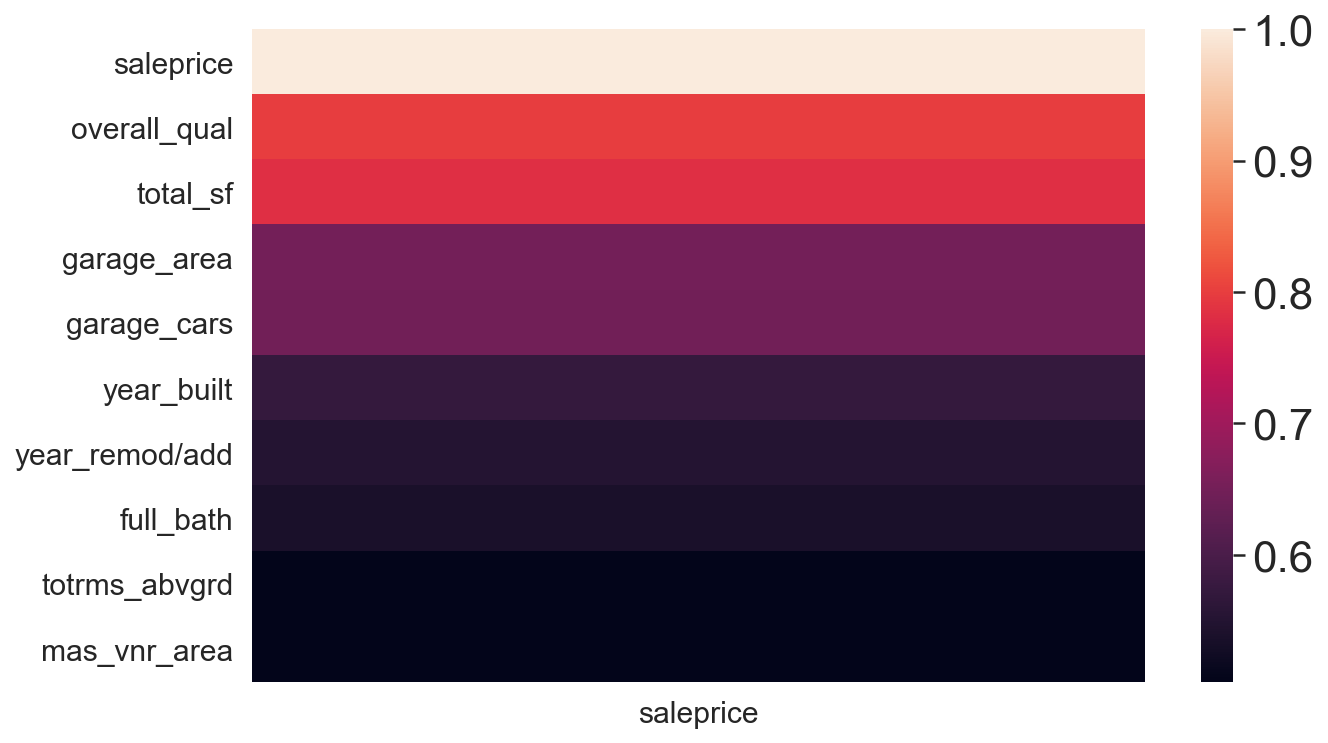

In [29]:
#Display the top 10 highly correlated features with saleprice.
fix, ax = plt.subplots(figsize=(10,6))
top_correlation=np.abs(train.corr())[['saleprice']].sort_values('saleprice',ascending=False)
sns.heatmap(top_correlation.head(10));
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15);

#### Plot of Highly Correlated Features and Remove Outliners

Highly correlated featurs are plotted to check the linearity and also to identify the outliners.

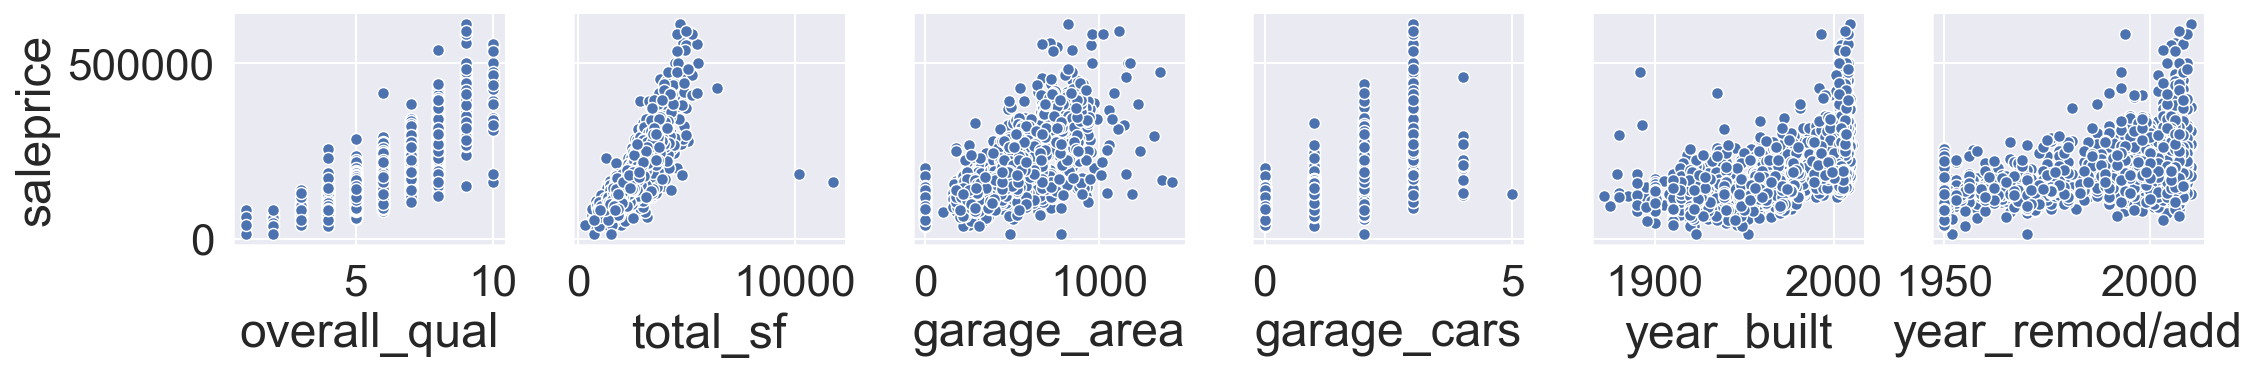

In [30]:
#See the plot of highly correlated features.
sns.pairplot(train,
            x_vars = ['overall_qual','total_sf','garage_area',
                      'garage_cars','year_built','year_remod/add'],
            y_vars = ['saleprice']);

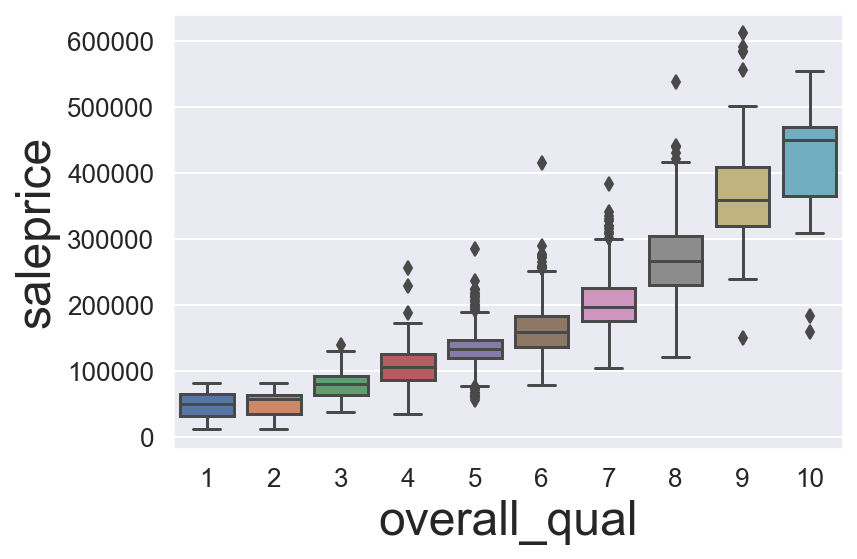

In [31]:
#Plot overall quality vs saleprice
b=sns.boxplot(x=train['overall_qual'], y=train['saleprice']);
b.tick_params(labelsize=13)

The above boxplot that displays overall quality vs saleprice clearly indicates how higher overall quality increases house price. 

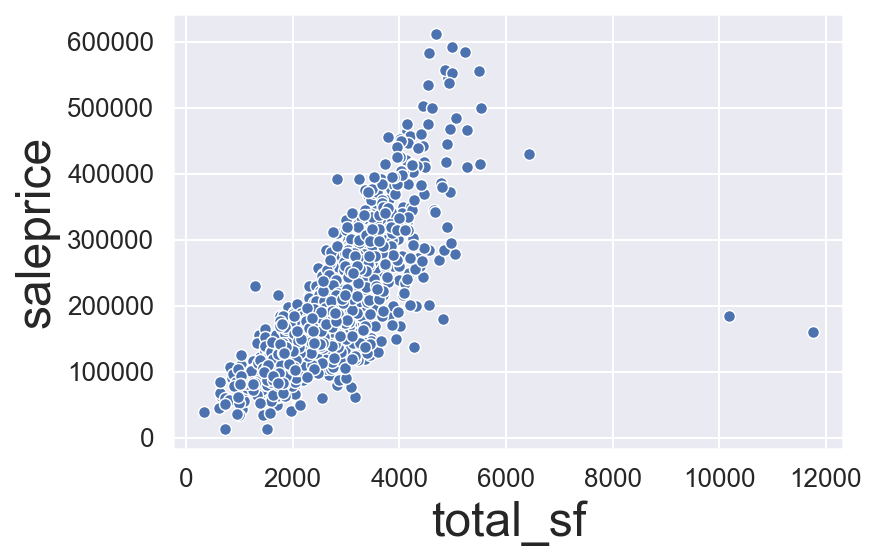

In [32]:
#Plot total square feet of the house vs saleprice
b=sns.scatterplot(x=train['total_sf'],y=train['saleprice']);
b.tick_params(labelsize=13)

Plot of 'total_sf' vs 'saleprice' shows the 2 outliners which shows large houses with low price. It looks unusual so were removed.

In [33]:
#Drop the 2 outliners which are 2 large houses with low saleprice
train = train[train['total_sf']<10000]

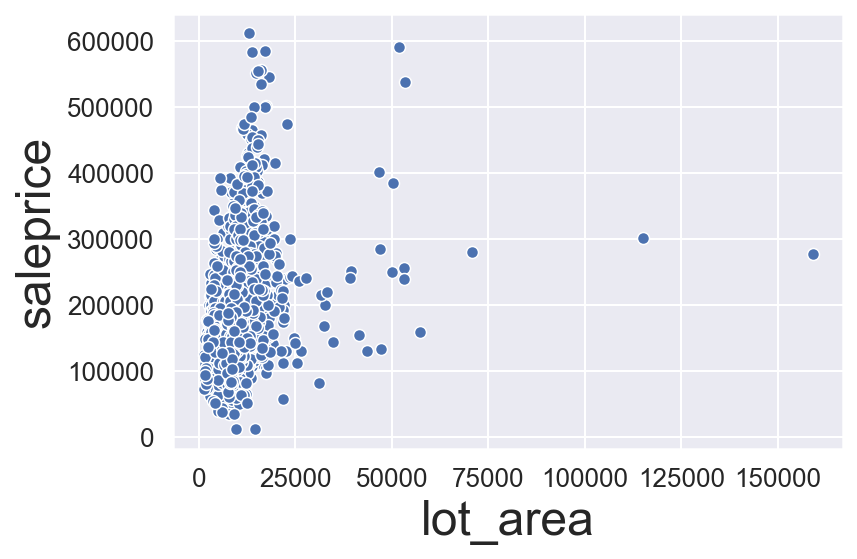

In [34]:
#Plot total lot area of the house vs saleprice
b=sns.scatterplot(x=train['lot_area'],y=train['saleprice']);
b.tick_params(labelsize=13)

In [35]:
#Drop the 2 outliners 
train = train[train['lot_area']<100000]

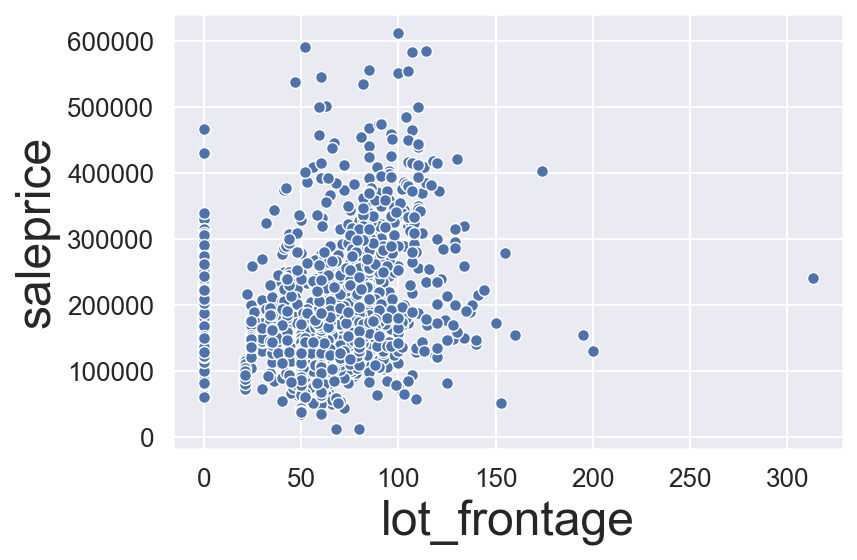

In [36]:
#Plot total lot area of the house vs saleprice
b=sns.scatterplot(x=train['lot_frontage'],y=train['saleprice']);
b.tick_params(labelsize=13)

In [37]:
#Drop the outliner
train = train[train['lot_frontage']<300]

#### Saleprice vs Year Sold
The boxplot above of year sold vs saleprice shows that the saleprice is not affected by the year the sales happened. It is also interesting to take note that the great recession in 2008 has not affected the saleprice in Ames, IA.

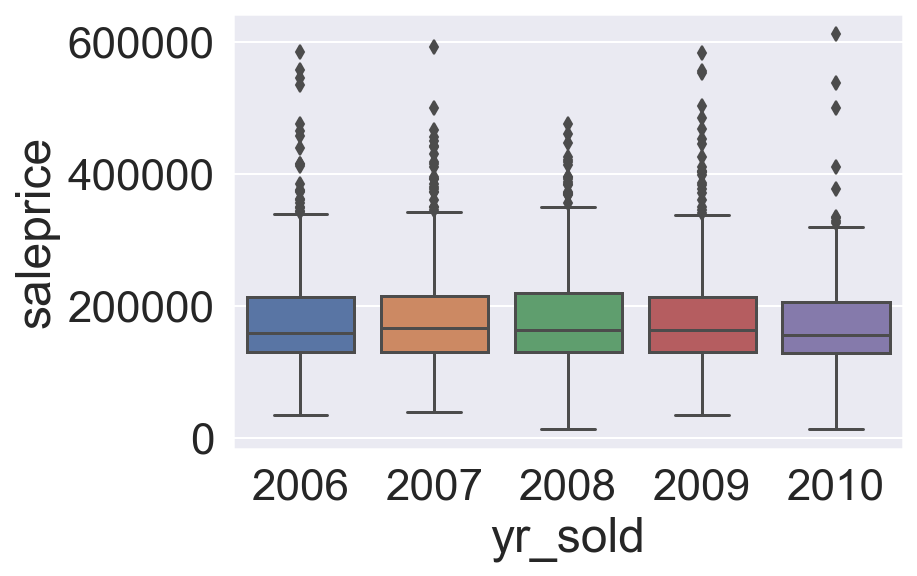

In [38]:
#Plot year sold of the house vs saleprice
b=sns.boxplot(x=train['yr_sold'], y=train['saleprice']);

#### Identify Neighborhood vs Saleprice
The below violin plot helps to identify neighborhoods that impact the saleprice. It is plotted after taking the mean of sale price by neighborhood

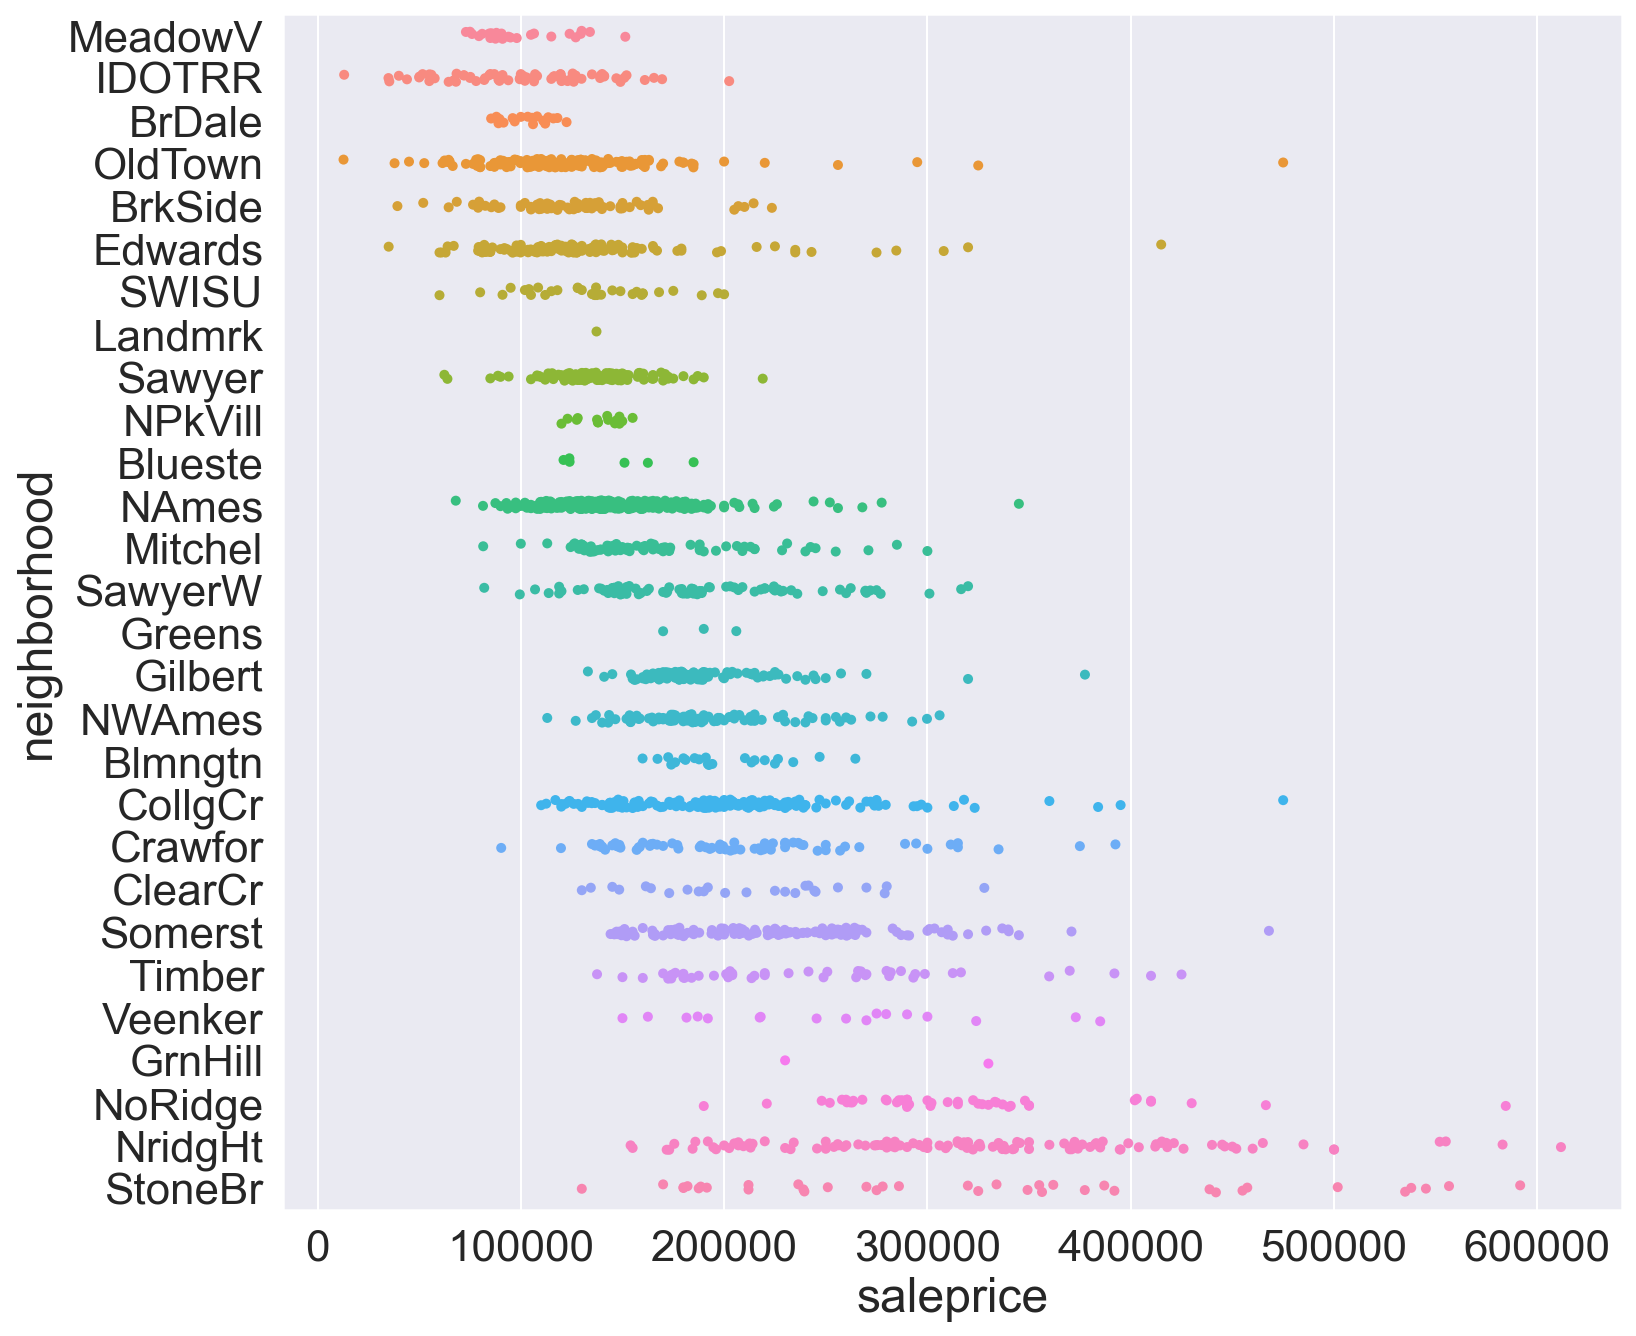

In [39]:
# exploring violin plot to identify neighborhoods that impact sale price positively
#plotted after taking the mean of sale price by neighborhood
fig_dims = (12, 11)
fig, ax = plt.subplots(figsize=fig_dims)
sorted_nb = train.groupby(['neighborhood'])['saleprice'].mean().sort_values()
b=sns.stripplot(x=train['saleprice'], y=train['neighborhood'], 
                 order=list(sorted_nb.index) ,ax = ax, orient = 'h')
plt.show();

The above plot of various neighbourhood vs saleprice helps to identify the neighbourhood that are expensive and those that are cheaper.

#### Saving the Dataframes

In [40]:
#Checking for any missing columns between train and test dataframe
missing_cols = set(train.columns) - set(kaggle_test.columns)
print(missing_cols)

{'saleprice'}


In [41]:
#Save the cleaned train dataframe.
train.to_csv('datasets/train_clean.csv', index=False)#save train dataframe to train_clean

In [42]:
#Save the cleaned test dataframe.
kaggle_test.to_csv('datasets/kaggle_test_clean.csv', index=False)#save test dataframe kaggle_test_clean